In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [ ]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [7 0 1 4 6 9 0 6 9 4]


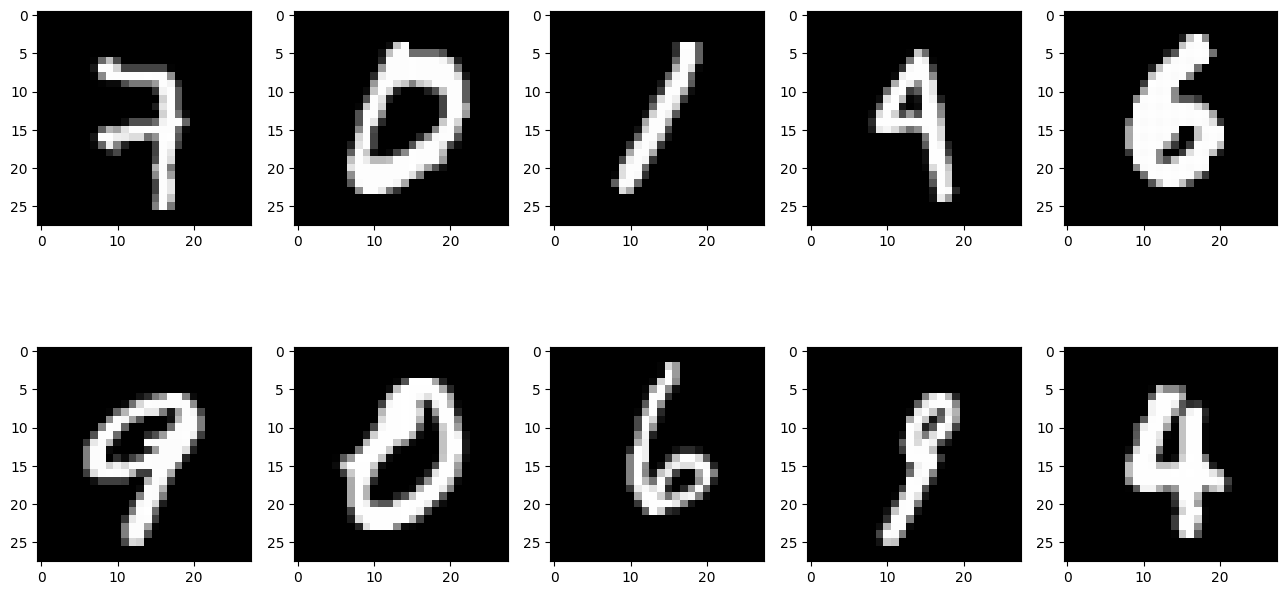

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [ ]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [ ]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [ ]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8425 - loss: 0.5281
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9604 - loss: 0.1352
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9725 - loss: 0.0900
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9767 - loss: 0.0751
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9809 - loss: 0.0620
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9838 - loss: 0.0514
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9852 - loss: 0.0466
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9883 - loss: 0.0368
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9894 - loss: 0.0320
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9884 - loss: 0.0337


Plot the loss and accuracy graphs

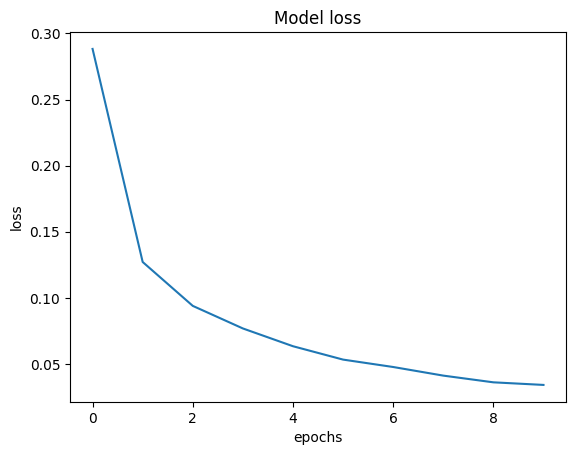

In [ ]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

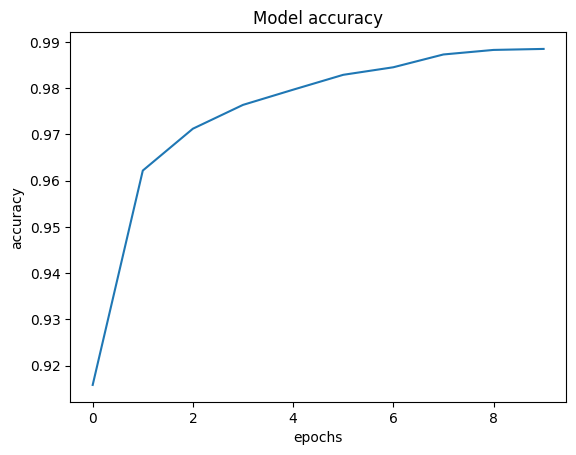

In [ ]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [ ]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9706 - loss: 0.1154
Loss of the Test dataset is: 0.0984814390540123
Accuracy of the test dataset is: 0.973800003528595


Save the model weights

In [ ]:
model.save_weights("MNIST_WEIGHTS_V1.weights.h5")

In [ ]:
# Task 3 — Model Improvements and Analysis

In [ ]:
# Baseline model (simple MLP as reference)
baseline = Sequential()
baseline.add(Flatten(input_shape=(28,28)))
baseline.add(Dense(128, activation="relu"))
baseline.add(Dense(10, activation="softmax"))

baseline.compile(optimizer="adam",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

baseline.fit(new_train_data, train_target, epochs=10, batch_size=128, verbose=2)
test_loss, test_acc = baseline.evaluate(new_test_data, test_target, verbose=0)
print("Baseline test accuracy:", round(test_acc*100, 2), "%")


Epoch 1/10
469/469 - 2s - 5ms/step - accuracy: 0.8982 - loss: 0.3663
Epoch 2/10
469/469 - 3s - 6ms/step - accuracy: 0.9521 - loss: 0.1660
Epoch 3/10
469/469 - 2s - 5ms/step - accuracy: 0.9658 - loss: 0.1186
Epoch 4/10
469/469 - 3s - 6ms/step - accuracy: 0.9737 - loss: 0.0914
Epoch 5/10
469/469 - 2s - 5ms/step - accuracy: 0.9785 - loss: 0.0742
Epoch 6/10
469/469 - 2s - 5ms/step - accuracy: 0.9826 - loss: 0.0606
Epoch 7/10
469/469 - 3s - 5ms/step - accuracy: 0.9852 - loss: 0.0510
Epoch 8/10
469/469 - 3s - 5ms/step - accuracy: 0.9878 - loss: 0.0434
Epoch 9/10
469/469 - 4s - 8ms/step - accuracy: 0.9899 - loss: 0.0365
Epoch 10/10
469/469 - 4s - 9ms/step - accuracy: 0.9915 - loss: 0.0309
Baseline test accuracy: 97.73 %


In [ ]:
# Try different hyperparameter configs
configs = [
    dict(units=128, layers=2, dropout=0.1),
    dict(units=256, layers=2, dropout=0.2),
    dict(units=512, layers=2, dropout=0.3),
]

best_acc, best_model, best_cfg = 0, None, None

for cfg in configs:
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    for _ in range(cfg["layers"]):
        model.add(Dense(cfg["units"], activation="relu"))
    if cfg["dropout"] > 0:
        from tensorflow.keras.layers import Dropout
        model.add(Dropout(cfg["dropout"]))
    model.add(Dense(10, activation="softmax"))

    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    model.fit(new_train_data, train_target,
              validation_split=0.1, epochs=10, batch_size=128, verbose=0)

    acc = model.evaluate(new_test_data, test_target, verbose=0)[1]
    print(cfg, "-> test acc:", round(acc*100, 2), "%")

    if acc > best_acc:
        best_acc, best_model, best_cfg = acc, model, cfg

print("\nBest config:", best_cfg)
print("Best test accuracy:", round(best_acc*100, 2), "%")


{'units': 128, 'layers': 2, 'dropout': 0.1} -> test acc: 97.83 %
{'units': 256, 'layers': 2, 'dropout': 0.2} -> test acc: 97.97 %
{'units': 512, 'layers': 2, 'dropout': 0.3} -> test acc: 98.24 %

Best config: {'units': 512, 'layers': 2, 'dropout': 0.3}
Best test accuracy: 98.24 %


In [26]:
from tensorflow.keras import regularizers

# L1
l1_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation="relu", kernel_regularizer=regularizers.l1(1e-5)),
    Dense(10, activation="softmax")
])
l1_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
l1_model.fit(new_train_data, train_target, epochs=10, batch_size=128, verbose=0)
print("L1 test accuracy:", l1_model.evaluate(new_test_data, test_target, verbose=0)[1])

# L2
l2_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation="relu", kernel_regularizer=regularizers.l2(1e-4)),
    Dense(10, activation="softmax")
])
l2_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
l2_model.fit(new_train_data, train_target, epochs=10, batch_size=128, verbose=0)
print("L2 test accuracy:", l2_model.evaluate(new_test_data, test_target, verbose=0)[1])

# L1+L2
l1l2_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, activation="relu", kernel_regularizer=regularizers.l1_l2(1e-5,1e-4)),
    Dense(10, activation="softmax")
])
l1l2_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
l1l2_model.fit(new_train_data, train_target, epochs=10, batch_size=128, verbose=0)
print("L1+L2 test accuracy:", l1l2_model.evaluate(new_test_data, test_target, verbose=0)[1])


L1+L2 test accuracy: 0.9789999723434448


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


L1 test accuracy: 0.9811000227928162
L2 test accuracy: 0.9797000288963318


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


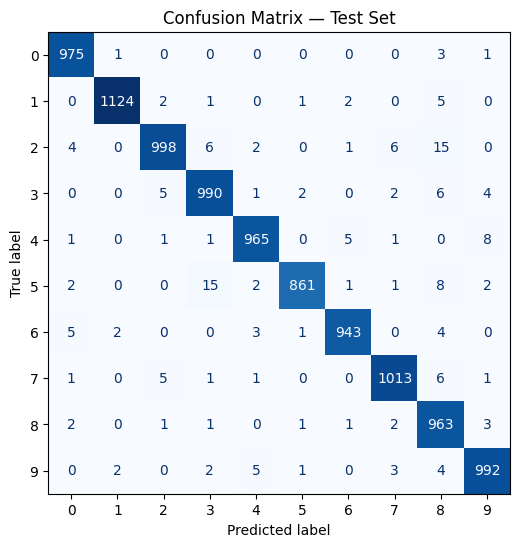


Classification report:

              precision    recall  f1-score   support

           0     0.9848    0.9949    0.9898       980
           1     0.9956    0.9903    0.9929      1135
           2     0.9862    0.9671    0.9765      1032
           3     0.9735    0.9802    0.9768      1010
           4     0.9857    0.9827    0.9842       982
           5     0.9931    0.9652    0.9790       892
           6     0.9895    0.9843    0.9869       958
           7     0.9854    0.9854    0.9854      1028
           8     0.9497    0.9887    0.9688       974
           9     0.9812    0.9832    0.9822      1009

    accuracy                         0.9824     10000
   macro avg     0.9825    0.9822    0.9823     10000
weighted avg     0.9826    0.9824    0.9824     10000



In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Use best_model from tuning
y_pred = np.argmax(best_model.predict(new_test_data), axis=1)

cm = confusion_matrix(test_target, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))

fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
plt.title("Confusion Matrix — Test Set")
plt.show()

print("\nClassification report:\n")
print(classification_report(test_target, y_pred, digits=4))
